# 11-14. 프로젝트: 한국어 데이터로 챗봇만들기

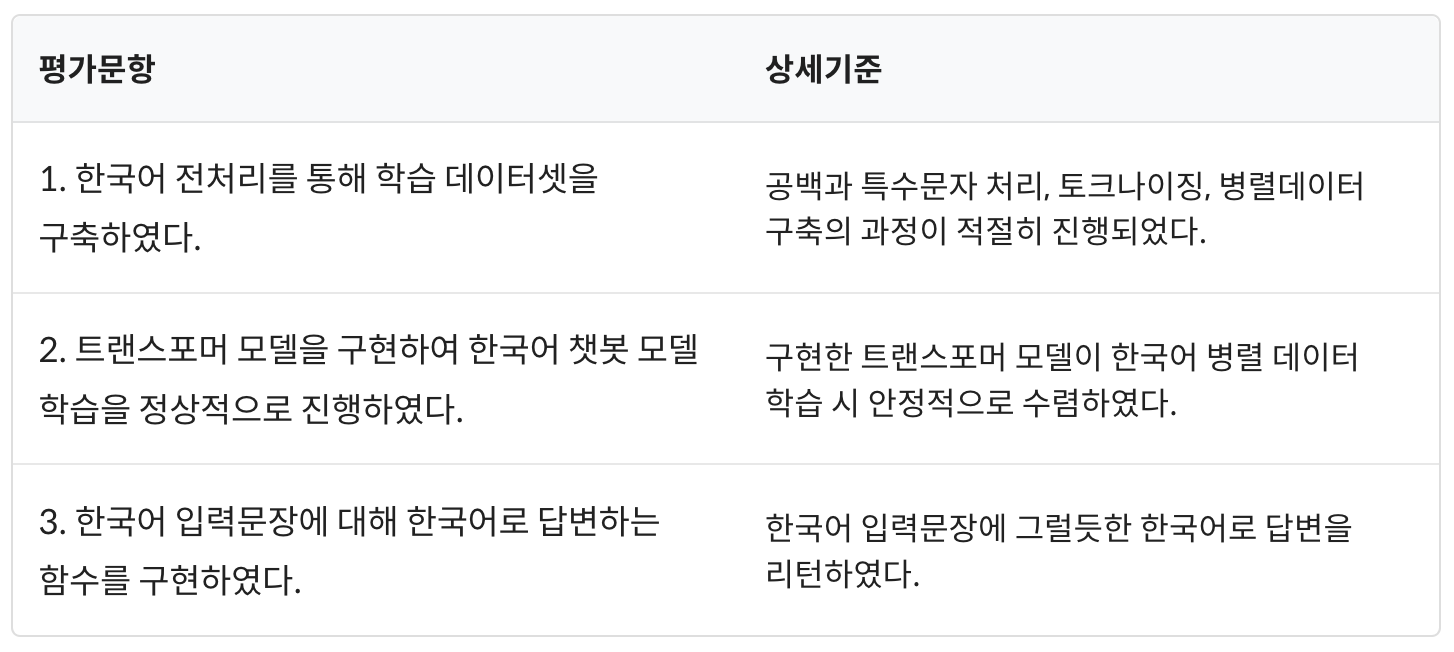

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import tensorflow as tf

## Step 1. 데이터 수집하기

In [2]:
data = pd.read_csv('/content/drive/MyDrive/0.AIFFEL/LMS node/Exp 11/ChatbotData .csv')

In [3]:
len(data)

11823

In [4]:
data.tail(50)

,Q,A,label
11773,한 눈에 반했어. 그녀한테 좋아한다고 해도 될까.,아직 이를 지도 몰라요. 천천히 다가가세요.,2
11774,한 사람만 죽을 때까지 사랑하는 게 가능할까?,그러기 힘들어서 결혼이라는 제도를 만든 걸 수도 있어요.,2
11775,한 사람만 죽을 때까지 사랑할 수 있을까?,가능해요!,2
11776,한 사람을 오랫동안 좋아하는게 신기하대.,쉬운 일은 아니에요.,2
11777,한쪽만 호감이면,짝사랑입니다.,2
11778,한폭의 그림 같은 우리,멋지네요.,2
11779,항상 내편이 생겨서 좋아,내 편이 생긴다는 자체가 행복하죠.,2
11780,항상 여친 집 데려다줘?,시간과 돈이 가능하면요.,2
11781,해외여행하다 숙소에서 만난 외국인이 너무 좋은데 이 연애 무리일까?,사랑에 국경은 없어요.,2
11782,헤어졌는데도 좋아하는거 별로임?,헤어지면 남이죠.,2


ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 데이터셋의 답들의 센스에 웃음이 터짐

데이터셋의 수가 생각보다는 작은듯

다른 질문에 같은 답이 여러개 있음

비속어나 축약 등 깔끔하지 않은 문장은 없어보임, 뛰어쓰기도 잘 되어 있음.

Q 에 어떤 문장들은 .으로 끝나기도 하고 .이 없기도 함.

## Step2. 데이터 전처리하기

영어 데이터와는 전혀 다른 데이터인 만큼 영어 데이터에 사용했던 전처리와 일부 동일한 전처리도 필요하겠지만 전체적으로는 다른 전처리를 수행해야 할 수도 있습니다.



In [5]:
tmp = "저를 만들어 준 사람을 부모님, 저랑 이야기해 주는 사람을 친구로 생각하고 있어요"
tmp = tmp + '.' if (not tmp.endswith('.')) or (not tmp.endswith('!')) or (not tmp.endswith('?')) else tmp
tmp1 = re.sub(r"([?.!,])", r" \1 ", tmp)
print(tmp1)
tmp1 = re.sub(r'[" "]+', " ", tmp1)
tmp1 = re.sub(r"[^ㄱ-ㅎ|ㅏ-ㅣ|가-힣?.!,]+", " ", tmp1)
tmp1.strip()

저를 만들어 준 사람을 부모님 ,  저랑 이야기해 주는 사람을 친구로 생각하고 있어요 . 


'저를 만들어 준 사람을 부모님 , 저랑 이야기해 주는 사람을 친구로 생각하고 있어요 .'

In [6]:
data.isnull().sum()

Q        0
A        0
label    0
dtype: int64

In [7]:
# Q와 A가 모두 중복인 데이터의 유무 파악
pd.set_option('display.max_rows', None)
data[data.duplicated(['Q', 'A'], keep='first')]

,Q,A,label
5527,결혼이나 하지 왜 자꾸 나한테 화 내냐구!,힘들겠네요.,1
5537,고백하고 후회하면 어떡하지,후회는 후회를 낳을뿐이에요. 용기 내세요.,1
5542,공부는 내 체질이 아닌 것 같아,확신이 없나봐요.,1
5704,기숙사 괜찮을까,혼자 사는 것보다 불편하겠죠.,1
5774,나는 좋은데 ….,현실의 벽에 부딪혔나봐요.,1
5828,남동생한테 자꾸 화내게 되네,화를 참는 연습을 해보세요.,1
5839,남자인지 여자인지 알려줘,아직 모르겠어요. 인공지능에 성별을 만드는 사람이 되어 주세요,1
5848,낭만이라고는 없어가지구,낭만적인 거 좋아하시는구나!,1
5865,내 이름이 없어,확인해달라고 해보세요.,1
5875,내가 뭘 좋아하는지 잘하는지 모르겠어,하나라도 있을 거니 열심히 찾아보세요.,1


In [8]:
test = (data['Q'] == '결혼이나 하지 왜 자꾸 나한테 화 내냐구!')
for i, boole in enumerate(test):
  if boole == True:
    print(i)


152
5527


In [9]:
data.loc[152]

Q        결혼이나 하지 왜 자꾸 나한테 화 내냐구!
A                         힘들겠네요.
label                          0
Name: 152, dtype: object

In [10]:
data.loc[5527]

Q        결혼이나 하지 왜 자꾸 나한테 화 내냐구!
A                         힘들겠네요.
label                          1
Name: 5527, dtype: object

In [11]:
# Q와 A가 모두 중복인 데이터의 유무 파악
len(data.drop_duplicates(['Q','A'], keep='first'))

11750

In [12]:
data = data.drop_duplicates(['Q','A'], keep='first')

- 영어와는 다르게 전처리가 필요한 것 같아서 그동안 복붙해오던 코드가 아닌 다른 것들을 찾아보았다. 


In [13]:
# 전처리 함수
def preprocess_sentence(sentence):
    sentence = sentence.lower().strip()
    # 문장 끝에 구두점이 없는 경우 구두점을 추가한다. 
    # 단어와 구두점(punctuation) 사이의 거리를 만듭니다.
    # 단어와 온점 사이에 거리를 만듭니다.
    ends = ['.', '?', '!']
    sentence = sentence + '.' if (not sentence.endswith(tuple(ends))) else sentence
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = re.sub(r'[" "]+', " ", sentence)

    # (가-힣, 알파벳, ".", "?", "!", ",")를 제외한 모든 문자를 공백인 ' '로 대체합니다.
    sentence = re.sub(r"[^a-zA-Z?.!가-힣ㄱ-ㅎㅏ-ㅣ0-9]+", " ", sentence) #한글 전처리
    sentence = sentence.strip()
    return sentence

In [14]:
questions = [preprocess_sentence(q) for q in data['Q']]
answers = [preprocess_sentence(a) for a in data['A']]

In [15]:
print('전체 Q의 수:', len(questions))
print('전체 A의 수:', len(answers))

전체 Q의 수: 11750
전체 A의 수: 11750


In [17]:
sentence = '회사에는 왜 친구 같은 사람이 없을까.'

In [18]:
tmp = data.at[7,'A']
tmp = tmp + '.' if (not tmp.endswith('.')) or (not sentence.endswith('!')) or (not sentence.endswith('?')) else tmp 
## 이렇게 만들어서 함수에 넣었을땐 왠지 모르지만 점이생김
tmp

'잘 모르고 있을 수도 있어요..'

In [19]:
preprocess_sentence(data.at[7,'A'])

'잘 모르고 있을 수도 있어요 .'

In [20]:
sen_n = 7
print(questions[sen_n])
print(answers[sen_n])

sns 맞팔 왜 안하지ㅠㅠ .
잘 모르고 있을 수도 있어요 .


## Step 3. SubwordTextEncoder 사용하기 

한국어 데이터는 형태소 분석기를 사용하여 토크나이징을 해야 한다고 많은 분이 알고 있습니다. 하지만 여기서는 형태소 분석기가 아닌 위 실습에서 사용했던 내부 단어 토크나이저인 SubwordTextEncoder를 그대로 사용해보세요.

In [21]:
# 단어장 만들기
import tensorflow_datasets as tfds

# 질문과 답변 데이터셋에 대해서 Vocabulary 생성
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(questions + answers, target_vocab_size=2**13)


In [22]:
print(tokenizer.subwords[:100])

[' .', ' ?', '거예요', '수_', '게_', '너무_', '더_', '거_', '좋아하는_', '는_', '이_', ' . ', '을_', '도_', '잘_', '고_', '요', '것_', '많이_', '안_', '좋은_', '같아요', '한_', '좀_', '있어요', '싶어', '나_', '가_', '에_', '있을_', '지_', '은_', '사람_', '해보세요', '할_', '해', '같아', '네', '면_', '를_', '건_', ' !', '사람이_', '마세요', '다_', '하고_', '지', '죠', '하는_', '보세요', '어', '서_', '의_', '내가_', '이제_', '마음이_', '내_', '다', '나', '다른_', '만_', '썸_', '그_', '어떻게_', '있는_', '왜_', '싶다', '세요', '다시_', '시간이_', '수도_', '것도_', '오늘_', '좋을_', '또_', '없어', '가', '정말_', '이', '같이_', '네요', '될_', '해요', '걸_', '있어', '없어요', '하세요', '자꾸_', '일_', '로_', '제가_', '길_', '바랄게요', '돼요', '까', '할까', '봐요', '하면_', '저도_', '으로_']


In [23]:
# 시작 토큰과 종료 토큰에 고유한 정수를 부여합니다.
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]

In [24]:
print('START_TOKEN의 번호 :' ,[tokenizer.vocab_size])
print('END_TOKEN의 번호 :' ,[tokenizer.vocab_size + 1])

START_TOKEN의 번호 : [8131]
END_TOKEN의 번호 : [8132]


In [25]:
# 시작 토큰과 종료 토큰을 고려하여 +2를 하여 단어장의 크기를 산정합니다.
VOCAB_SIZE = tokenizer.vocab_size + 2
print(VOCAB_SIZE)

8133


76


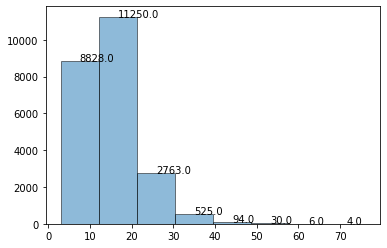

In [26]:
# 각 문장들의 글자수 확인해보기
num_qa = []
for sen in questions:
  num_qa.append(len(sen))
for sen in answers:
  num_qa.append(len(sen))
print(np.max(num_qa))

a, b, patches = plt.hist(num_qa,bins=8,align = 'mid', alpha = 0.5, edgecolor='black')

for pp in patches:
   x = (pp._x0 + pp._x1)/2
   y = pp._y1 + 0.05
   plt.text(x, y, pp._y1)


plt.show()

In [27]:
print(patches[1])

Rectangle(xy=(12.125, 0), width=9.125, height=11250, angle=0)


50개 이상은 전체중에 40개밖에 없으므로 max_lan = 50 으로 해본다.

In [28]:
# 샘플의 최대 허용 길이 또는 패딩 후의 최종 길이
MAX_LENGTH = 50
print(MAX_LENGTH)

50


In [29]:
# 정수 인코딩, 최대 길이를 초과하는 샘플 제거, 패딩
def tokenize_and_filter(inputs, outputs):
  tokenized_inputs, tokenized_outputs = [], []
  
  for (sentence1, sentence2) in zip(inputs, outputs):
    # 정수 인코딩 과정에서 시작 토큰과 종료 토큰을 추가
    sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
    sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN

    # 최대 길이 40 이하인 경우에만 데이터셋으로 허용
    if len(sentence1) <= MAX_LENGTH and len(sentence2) <= MAX_LENGTH:
      tokenized_inputs.append(sentence1)
      tokenized_outputs.append(sentence2)
  
  # 최대 길이 40으로 모든 데이터셋을 패딩
  tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
  tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_outputs, maxlen=MAX_LENGTH, padding='post')
  
  return tokenized_inputs, tokenized_outputs


In [30]:
questions, answers = tokenize_and_filter(questions, answers)
print('단어장의 크기 :',(VOCAB_SIZE))
print('필터링 후의 질문 샘플 개수: {}'.format(len(questions)))
print('필터링 후의 답변 샘플 개수: {}'.format(len(answers)))

단어장의 크기 : 8133
필터링 후의 질문 샘플 개수: 11750
필터링 후의 답변 샘플 개수: 11750


In [31]:
## 교사 강요 사용하기...(안했을 때랑 했을떄 비교해볼까....?)
## batch_size, buffer_size??

BATCH_SIZE = 64
BUFFER_SIZE = 20000

# 디코더는 이전의 target을 다음의 input으로 사용합니다.
# 이에 따라 outputs에서는 START_TOKEN을 제거하겠습니다.
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': questions,
        'dec_inputs': answers[:, :-1]
    },
    {
        'outputs': answers[:, 1:]
    },
))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)


## Step 4. 모델 구성하기

위 실습 내용을 참고하여 트랜스포머 모델을 구현합니다.

In [40]:
# 포지셔널 인코딩 레이어
class PositionalEncoding(tf.keras.layers.Layer):

  def __init__(self, position, d_model):
    super(PositionalEncoding, self).__init__()
    self.pos_encoding = self.positional_encoding(position, d_model)

  def get_angles(self, position, i, d_model):
    angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
    return position * angles

  def positional_encoding(self, position, d_model):
    # 각도 배열 생성
    angle_rads = self.get_angles(
        position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
        i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
        d_model=d_model)

    # 배열의 짝수 인덱스에는 sin 함수 적용
    sines = tf.math.sin(angle_rads[:, 0::2])
    # 배열의 홀수 인덱스에는 cosine 함수 적용
    cosines = tf.math.cos(angle_rads[:, 1::2])

    # sin과 cosine이 교차되도록 재배열
    pos_encoding = tf.stack([sines, cosines], axis=0)
    pos_encoding = tf.transpose(pos_encoding,[1, 2, 0]) 
    pos_encoding = tf.reshape(pos_encoding, [position, d_model])

    pos_encoding = pos_encoding[tf.newaxis, ...]
    return tf.cast(pos_encoding, tf.float32)

  def call(self, inputs):
    return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

# 스케일드 닷 프로덕트 어텐션 함수
def scaled_dot_product_attention(query, key, value, mask):
  # 어텐션 가중치는 Q와 K의 닷 프로덕트
  matmul_qk = tf.matmul(query, key, transpose_b=True)

  # 가중치를 정규화
  depth = tf.cast(tf.shape(key)[-1], tf.float32)
  logits = matmul_qk / tf.math.sqrt(depth)

  # 패딩에 마스크 추가
  if mask is not None:
    logits += (mask * -1e9)

  # softmax적용
  attention_weights = tf.nn.softmax(logits, axis=-1)

  # 최종 어텐션은 가중치와 V의 닷 프로덕트
  output = tf.matmul(attention_weights, value)
  return output

class MultiHeadAttention(tf.keras.layers.Layer):

  def __init__(self, d_model, num_heads, name="multi_head_attention"):
    super(MultiHeadAttention, self).__init__(name=name)
    self.num_heads = num_heads
    self.d_model = d_model

    assert d_model % self.num_heads == 0

    self.depth = d_model // self.num_heads

    self.query_dense = tf.keras.layers.Dense(units=d_model)
    self.key_dense = tf.keras.layers.Dense(units=d_model)
    self.value_dense = tf.keras.layers.Dense(units=d_model)

    self.dense = tf.keras.layers.Dense(units=d_model)

  def split_heads(self, inputs, batch_size):
    inputs = tf.reshape(
        inputs, shape=(batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(inputs, perm=[0, 2, 1, 3])

  def call(self, inputs):
    query, key, value, mask = inputs['query'], inputs['key'], inputs[
        'value'], inputs['mask']
    batch_size = tf.shape(query)[0]

    # Q, K, V에 각각 Dense를 적용합니다
    query = self.query_dense(query)
    key = self.key_dense(key)
    value = self.value_dense(value)

    # 병렬 연산을 위한 머리를 여러 개 만듭니다
    query = self.split_heads(query, batch_size)
    key = self.split_heads(key, batch_size)
    value = self.split_heads(value, batch_size)

    # 스케일드 닷 프로덕트 어텐션 함수
    scaled_attention = scaled_dot_product_attention(query, key, value, mask)

    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

    # 어텐션 연산 후에 각 결과를 다시 연결(concatenate)합니다
    concat_attention = tf.reshape(scaled_attention,
                                  (batch_size, -1, self.d_model))

    # 최종 결과에도 Dense를 한 번 더 적용합니다
    outputs = self.dense(concat_attention)

    return outputs

def create_padding_mask(x):
  mask = tf.cast(tf.math.equal(x, 0), tf.float32)
  # (batch_size, 1, 1, sequence length)
  return mask[:, tf.newaxis, tf.newaxis, :]

def create_look_ahead_mask(x):
  seq_len = tf.shape(x)[1]
  look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
  padding_mask = create_padding_mask(x)
  return tf.maximum(look_ahead_mask, padding_mask)

# 인코더 하나의 레이어를 함수로 구현.
# 이 하나의 레이어 안에는 두 개의 서브 레이어가 존재합니다.
def encoder_layer(units, d_model, num_heads, dropout, name="encoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")

  # 패딩 마스크 사용
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # 첫 번째 서브 레이어 : 멀티 헤드 어텐션 수행 (셀프 어텐션)
  attention = MultiHeadAttention(
      d_model, num_heads, name="attention")({
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': padding_mask
      })

  # 어텐션의 결과는 Dropout과 Layer Normalization이라는 훈련을 돕는 테크닉을 수행
  attention = tf.keras.layers.Dropout(rate=dropout)(attention)
  attention = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(inputs + attention)

  # 두 번째 서브 레이어 : 2개의 완전연결층
  outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # 완전연결층의 결과는 Dropout과 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention + outputs)

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)

def encoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name="encoder"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")

  # 패딩 마스크 사용
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # 임베딩 레이어
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

  # 포지셔널 인코딩
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  # num_layers만큼 쌓아올린 인코더의 층.
  for i in range(num_layers):
    outputs = encoder_layer(
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
        name="encoder_layer_{}".format(i),
    )([outputs, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)

# 디코더 하나의 레이어를 함수로 구현.
# 이 하나의 레이어 안에는 세 개의 서브 레이어가 존재합니다.
def decoder_layer(units, d_model, num_heads, dropout, name="decoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
  enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name="look_ahead_mask")
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

  # 첫 번째 서브 레이어 : 멀티 헤드 어텐션 수행 (셀프 어텐션)
  attention1 = MultiHeadAttention(
      d_model, num_heads, name="attention_1")(inputs={
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': look_ahead_mask
      })

  # 멀티 헤드 어텐션의 결과는 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
  attention1 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention1 + inputs)

  # 두 번째 서브 레이어 : 마스크드 멀티 헤드 어텐션 수행 (인코더-디코더 어텐션)
  attention2 = MultiHeadAttention(
      d_model, num_heads, name="attention_2")(inputs={
          'query': attention1,
          'key': enc_outputs,
          'value': enc_outputs,
          'mask': padding_mask
      })

  # 마스크드 멀티 헤드 어텐션의 결과는
  # Dropout과 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
  attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
  attention2 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention2 + attention1)

  # 세 번째 서브 레이어 : 2개의 완전연결층
  outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention2)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # 완전연결층의 결과는 Dropout과 LayerNormalization 수행
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(outputs + attention2)

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)

def decoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name='decoder'):
  inputs = tf.keras.Input(shape=(None,), name='inputs')
  enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name='look_ahead_mask')

  # 패딩 마스크
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')
  
  # 임베딩 레이어
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

  # 포지셔널 인코딩
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

  # Dropout이라는 훈련을 돕는 테크닉을 수행
  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  for i in range(num_layers):
    outputs = decoder_layer(
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
        name='decoder_layer_{}'.format(i),
    )(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)

def transformer(vocab_size,
                num_layers,
                units,
                d_model,
                num_heads,
                dropout,
                name="transformer"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")
  dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

  # 인코더에서 패딩을 위한 마스크
  enc_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='enc_padding_mask')(inputs)

  # 디코더에서 미래의 토큰을 마스크 하기 위해서 사용합니다.
  # 내부적으로 패딩 마스크도 포함되어져 있습니다.
  look_ahead_mask = tf.keras.layers.Lambda(
      create_look_ahead_mask,
      output_shape=(1, None, None),
      name='look_ahead_mask')(dec_inputs)

  # 두 번째 어텐션 블록에서 인코더의 벡터들을 마스킹
  # 디코더에서 패딩을 위한 마스크
  dec_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='dec_padding_mask')(inputs)

  # 인코더
  enc_outputs = encoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
  )(inputs=[inputs, enc_padding_mask])

  # 디코더
  dec_outputs = decoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
  )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

  # 완전연결층
  outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

  return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)


In [41]:
## 모델 생성하기

tf.keras.backend.clear_session()

# 하이퍼파라미터
NUM_LAYERS = 2 # 인코더와 디코더의 층의 개수
D_MODEL = 256 # 인코더와 디코더 내부의 입, 출력의 고정 차원
NUM_HEADS = 8 # 멀티 헤드 어텐션에서의 헤드 수 
UNITS = 512 # 피드 포워드 신경망의 은닉층의 크기
DROPOUT = 0.1 # 드롭아웃의 비율

model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model.summary()

Model: "transformer"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, None)]       0           []                               
                                                                                                  
 dec_inputs (InputLayer)        [(None, None)]       0           []                               
                                                                                                  
 enc_padding_mask (Lambda)      (None, 1, 1, None)   0           ['inputs[0][0]']                 
                                                                                                  
 encoder (Functional)           (None, None, 256)    3136256     ['inputs[0][0]',                 
                                                                  'enc_padding_mask[0][0

In [42]:
## 손실함수

def loss_function(y_true, y_pred):
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  
  loss = tf.keras.losses.SparseCategoricalCrossentropy(
      from_logits=True, reduction='none')(y_true, y_pred)

  mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
  loss = tf.multiply(loss, mask)

  return tf.reduce_mean(loss)


In [43]:
## 커스텀 된 학습률

class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

  def __init__(self, d_model, warmup_steps=4000):
    super(CustomSchedule, self).__init__()

    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps

  def __call__(self, step):
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps**-1.5)

    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)


In [44]:
## 모델 컴파일

learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])


In [45]:
## 훈련하기
EPOCHS = 50
history = model.fit(dataset, epochs=EPOCHS, verbose=1)

Epoch 1/50
184/184 [==============================] - 22s 76ms/step - loss: 1.1598 - accuracy: 0.0240
Epoch 2/50
184/184 [==============================] - 13s 72ms/step - loss: 0.9386 - accuracy: 0.0399
Epoch 3/50
184/184 [==============================] - 13s 73ms/step - loss: 0.8004 - accuracy: 0.0409
Epoch 4/50
184/184 [==============================] - 13s 73ms/step - loss: 0.7406 - accuracy: 0.0437
Epoch 5/50
184/184 [==============================] - 13s 73ms/step - loss: 0.6948 - accuracy: 0.0463
Epoch 6/50
184/184 [==============================] - 13s 73ms/step - loss: 0.6472 - accuracy: 0.0496
Epoch 7/50
184/184 [==============================] - 13s 73ms/step - loss: 0.5957 - accuracy: 0.0541
Epoch 8/50
184/184 [==============================] - 13s 73ms/step - loss: 0.5380 - accuracy: 0.0602
Epoch 9/50
184/184 [==============================] - 13s 73ms/step - loss: 0.4764 - accuracy: 0.0672
Epoch 10/50
184/184 [==============================] - 13s 73ms/step - loss: 0.411

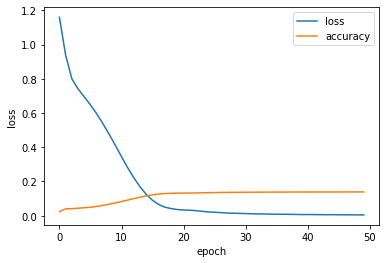

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss','accuracy'])
plt.show()

## Step 5. 모델 평가하기

Step 1에서 선택한 전처리 방법을 고려하여 입력된 문장에 대해서 대답을 얻는 예측 함수를 만듭니다.

In [56]:
def decoder_inference(sentence):
  sentence = preprocess_sentence(sentence)

  # 입력된 문장을 정수 인코딩 후, 시작 토큰과 종료 토큰을 앞뒤로 추가.
  # ex) Where have you been? → [[8331   86   30    5 1059    7 8332]]
  sentence = tf.expand_dims(
      START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)

  # 디코더의 현재까지의 예측한 출력 시퀀스가 지속적으로 저장되는 변수.
  # 처음에는 예측한 내용이 없음으로 시작 토큰만 별도 저장. ex) 8331
  output_sequence = tf.expand_dims(START_TOKEN, 0)

  # 디코더의 인퍼런스 단계
  for i in range(MAX_LENGTH):
    # 디코더는 최대 MAX_LENGTH의 길이만큼 다음 단어 예측을 반복합니다.
    predictions = model(inputs=[sentence, output_sequence], training=False)
    predictions = predictions[:, -1:, :]

    # 현재 예측한 단어의 정수
    predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

    # 만약 현재 예측한 단어가 종료 토큰이라면 for문을 종료
    if tf.equal(predicted_id, END_TOKEN[0]):
      break

    # 예측한 단어들은 지속적으로 output_sequence에 추가됩니다.
    # 이 output_sequence는 다시 디코더의 입력이 됩니다.
    output_sequence = tf.concat([output_sequence, predicted_id], axis=-1)

  return tf.squeeze(output_sequence, axis=0)

def sentence_generation(sentence):
  # 입력 문장에 대해서 디코더를 동작 시켜 예측된 정수 시퀀스를 리턴받습니다.
  prediction = decoder_inference(sentence)

  # 정수 시퀀스를 다시 텍스트 시퀀스로 변환합니다.
  predicted_sentence = tokenizer.decode(
      [i for i in prediction if i < tokenizer.vocab_size])

  print('입력 : {}'.format(sentence))
  print('출력 : {}'.format(predicted_sentence))



In [57]:
sentence_generation('날씨가 좋았으면 좋겠어.')

입력 : 날씨가 좋았으면 좋겠어.
출력 : 날씨가 안 좋더라도 데이트는 성공적일 거예요 .


In [58]:
sentence_generation('날씨가 좋았으면 좋겠어')

입력 : 날씨가 좋았으면 좋겠어
출력 : 날씨가 안 좋더라도 데이트는 성공적일 거예요 .


In [59]:
sentence_generation('오늘은 기분이 조금 쳐지는거 같아')

입력 : 오늘은 기분이 조금 쳐지는거 같아
출력 : 그럴 수 있어요 .


In [60]:
sentence_generation('저녁 뭐 먹을까?')

입력 : 저녁 뭐 먹을까?
출력 : 맛있는 거 드세요 .


In [61]:
sentence_generation('시간이 너무 빨리가')

입력 : 시간이 너무 빨리가
출력 : 시간은 상대적으로 흘러갑니다 .


In [62]:
sentence_generation('부지런하게 살고 싶어')

입력 : 부지런하게 살고 싶어
출력 : 사람에 따라 다르겠지요 .


In [65]:
sentence_generation('여행 가고 싶어')

입력 : 여행 가고 싶어
출력 : 바쁘게 사나봅니다 .


In [70]:
sentence_generation('이런들 어떠하며 저런들 어떠하리')

입력 : 이런들 어떠하며 저런들 어떠하리
출력 : 많이 지쳤나봐요 .


In [73]:
sentence_generation('이 몸이 죽고죽어 일백번 고쳐죽어')

입력 : 이 몸이 죽고죽어 일백번 고쳐죽어
출력 : 나쁜 생각은 버리세요 .


In [77]:
sentence_generation('넌 누구니?')

입력 : 넌 누구니?
출력 : 저는 위로봇입니다 .


## 회고 

- 어텐션이라는 새로운 모델이 어려웠지만 뭔가 재밌었다. 노드 설명에서는 영어로 진행되었는데, 프로젝트에서는 한글로 되어 있어서 전처리 과정에서 시간이 오래 소요되었다. 정규표현식에서 한글을 추가하고, 데이터를 살펴보니 문장의 마침표가 있는것과 없는 것이 섞여 있어서 전처리에서 문장에 마지막에 구두점이 없는 경우 구두점을 추가하는 코드를 추가했다. 

- 토크나이저를 다른 것으로 써보려고 했으나 노드에서 subwordtextencoder를 쓰라고 해서 다른 것을 시도하진 않았지만, 다양한 토크나이저를 사용해보고 싶다.

- 학습이 잘 되었는지 정량적으로 판단할 수 있는 것이 어떤 것이 있을까 고민해보았는데, 자연어는 판단하는 기준자체도 어려운 것 같다. 

- 그동안 자연어처리모델로 RNN, LSTM을 배웠는데, 문장 결과가 확실히 다른 것을 느꼈다. 어떤 문장을 넣느냐에 따라 결과가 말이 안되는 경우가 있었지만, 문장이 안되는 경우는 적은 것 같았다. 



